In [2]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 

import re
import string
import unicodedata

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from bs4 import BeautifulSoup

import os

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Read in the Data

In [18]:
in_dir = "C:/Users/st50/Documents/sandbox/data"
out_dir = "C:/Users/st50/Documents/sandbox/out"

%time kiva_df=pd.read_csv(os.path.join(in_dir, "kiva.csv"))
#kiva_df = kiva_df.sample(frac=0.1)

kiva_df.dropna(inplace=True)
kiva_df['en_length'] = kiva_df['en'].apply(len)

list(kiva_df)
kiva_df.info()
kiva_df.shape
kiva_df.head()
kiva_df.tail()

Wall time: 237 ms


['status',
 'sector',
 'en',
 'country',
 'gender',
 'loan_amount',
 'nonpayment',
 'en_length']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7882 entries, 0 to 7987
Data columns (total 8 columns):
status         7882 non-null object
sector         7882 non-null object
en             7882 non-null object
country        7882 non-null object
gender         7882 non-null object
loan_amount    7882 non-null float64
nonpayment     7882 non-null object
en_length      7882 non-null int64
dtypes: float64(1), int64(1), object(6)
memory usage: 554.2+ KB


(7882, 8)

,status,sector,en,country,gender,loan_amount,nonpayment,en_length
0,defaulted,Agriculture,<i>This description is written by Rowland Amul...,Kenya,M,500.0,lender,897
1,defaulted,Food,<i>This description is written by Rowland Amul...,Kenya,F,500.0,lender,1279
2,defaulted,Food,<i>This description was written by Richard Maz...,Kenya,M,500.0,lender,897
3,defaulted,Services,<i>This description was written by Rowland Amu...,Kenya,F,500.0,lender,737
4,defaulted,Construction,<i>This description was written by Rowland Amu...,Kenya,M,500.0,lender,798


,status,sector,en,country,gender,loan_amount,nonpayment,en_length
7983,paid,Clothing,Rosa is a member of the 3 de Mayo Communal Ban...,Ecuador,F,1050.0,lender,1401
7984,paid,Agriculture,"The communal bank, ""Cumbe,"" is located on the ...",Ecuador,F,2650.0,partner,5315
7985,paid,Food,Gladys Burgos Macas is a member of the 3 de Ma...,Ecuador,F,775.0,partner,809
7986,paid,Retail,The Communal Bank <em>Las Caleras</em> is loca...,Ecuador,F,275.0,partner,1800
7987,paid,Services,Eliud Ouma owns the Purple Hut salon located o...,Kenya,M,275.0,partner,642


# EDA

Text(0.8,0,'2391')

Text(0.8,1,'1862')

Text(0.8,2,'1097')

Text(0.8,3,'1070')

Text(0.8,4,'813')

Text(0.8,5,'156')

Text(0.8,6,'143')

Text(0.8,7,'141')

Text(0.8,8,'87')

Text(0.8,9,'48')

Text(0.8,10,'35')

Text(0.8,11,'18')

Text(0.8,12,'14')

Text(0.8,13,'4')

Text(0.8,14,'3')

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 <a list of 7 Text xticklabel objects>)

Text(0.5,0,'Number of loans were given')

Text(0,0.5,'Sector Name')

Text(0.5,1,'Top sectors in which more loans were given')

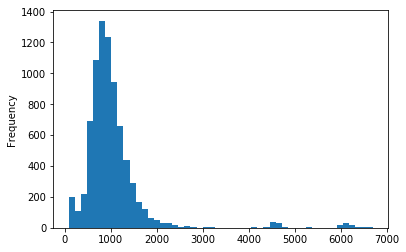

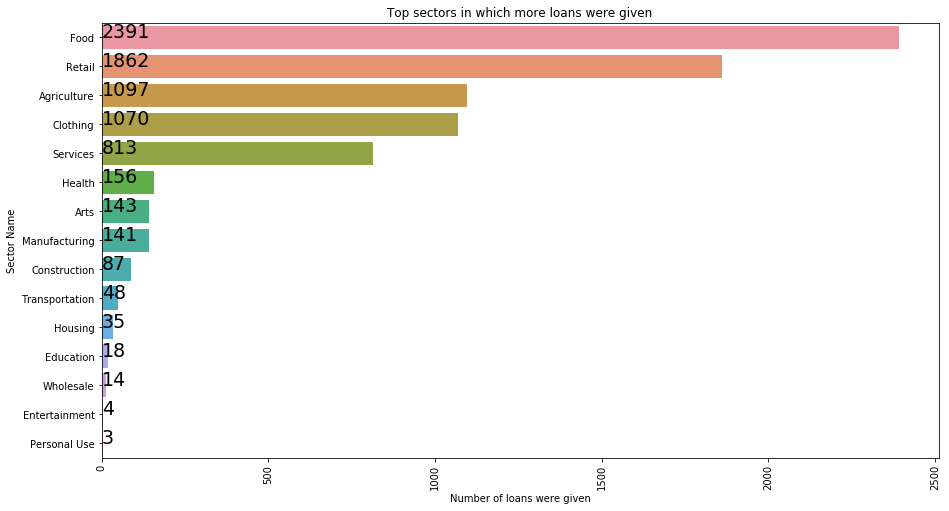

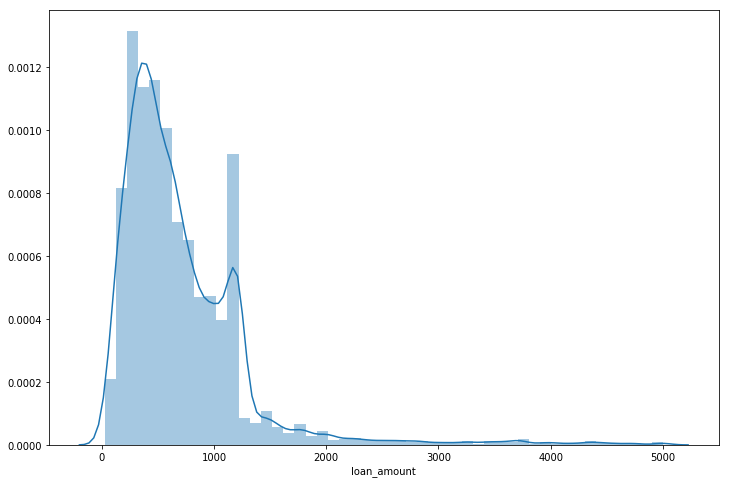

Text(0.5,0,'index')

Text(0,0.5,'loan_amount')

Text(0.5,1,'Loan Amount Distribution')

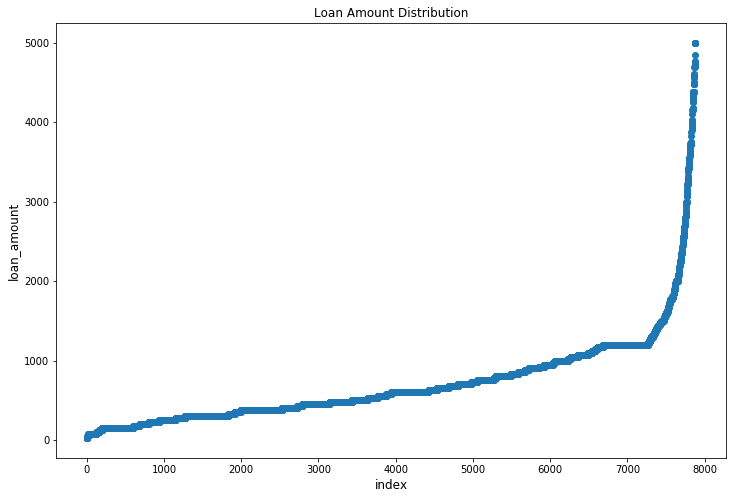

In [23]:
%matplotlib inline
color = sns.color_palette()

kiva_df['en_length'].plot(bins=50, kind='hist') 


plt.figure(figsize=(15,8))
sector_name = kiva_df['sector'].value_counts()
sns.barplot(sector_name.values, sector_name.index)
for i, v in enumerate(sector_name.values):
    plt.text(0.8,i,v,color='k',fontsize=19)
plt.xticks(rotation='vertical')
plt.xlabel('Number of loans were given')
plt.ylabel('Sector Name')
plt.title("Top sectors in which more loans were given")
plt.show()
#Food is in the top sectors

plt.figure(figsize = (12, 8))

sns.distplot(kiva_df['loan_amount'])
plt.show() 


plt.figure(figsize = (12, 8))
plt.scatter(range(kiva_df.shape[0]), np.sort(kiva_df.loan_amount.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('loan_amount', fontsize=12)
plt.title("Loan Amount Distribution")
plt.show()

# Text Preprocessing

In [26]:
from nltk.corpus import stopwords 
from bs4 import BeautifulSoup
import unidecode

stop_words = set(stopwords.words('english') + stopwords.words('spanish'))

lemmer = WordNetLemmatizer()

def preprocess(x):
    # Remove HTML tags
    x = BeautifulSoup(x, "lxml").get_text()

    # Lower case
    x = x.lower()
    
    # Remove punctuation
    x = re.sub(r'[^\w\s]', '', x)
    
    # Remove non-unicode
    x = unidecode.unidecode(x)
    
    # Remove numbers
    x = re.sub(r'\d+', '', x)
    
    # Remove stopwords and lemmatize
    x = [lemmer.lemmatize(w) for w in x.split() if w not in stop_words]
    return ' '.join(x) 

%time kiva_df['en_clean'] = kiva_df['en'].apply(preprocess)
kiva_df.head()

Wall time: 15.8 s


,status,sector,en,country,gender,loan_amount,nonpayment,en_length,en_clean
0,defaulted,Agriculture,<i>This description is written by Rowland Amul...,Kenya,M,500.0,lender,897,description written rowland amulyoto staff mem...
1,defaulted,Food,<i>This description is written by Rowland Amul...,Kenya,F,500.0,lender,1279,description written rowland amulyoto staff mem...
2,defaulted,Food,<i>This description was written by Richard Maz...,Kenya,M,500.0,lender,897,description written richard mazengo staff memb...
3,defaulted,Services,<i>This description was written by Rowland Amu...,Kenya,F,500.0,lender,737,description written rowland amulyoto staff mem...
4,defaulted,Construction,<i>This description was written by Rowland Amu...,Kenya,M,500.0,lender,798,description written rowland amulyoto staff mem...


# BOW - TFIDF

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(min_df=.05, max_df=.5, ngram_range=[1,3])
%time dtm_tfidf = tfidf_vectorizer.fit_transform(kiva_df['en_clean'])

bow_df_tfidf = pd.DataFrame(dtm_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names(), index=kiva_df.index)
bow_df_tfidf.shape

kiva_df_bow_tfidf = pd.concat([kiva_df, bow_df_tfidf], axis=1)
kiva_df_bow_tfidf.drop(columns=['en', 'en_clean'], inplace=True)
kiva_df_bow_tfidf.shape
kiva_df_bow_tfidf.head()

Wall time: 8.23 s


(7882, 342)

(7882, 349)

,status,sector,country,gender,loan_amount,nonpayment,en_length,able,access,access business,...,working,would,would like,wwwmifexorg,year ago,year experience,year old,year old married,yearold,young
0,defaulted,Agriculture,Kenya,M,500.0,lender,897,0.121480,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,defaulted,Food,Kenya,F,500.0,lender,1279,0.000000,0.0,0.0,...,0.0,0.106737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,defaulted,Food,Kenya,M,500.0,lender,897,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,defaulted,Services,Kenya,F,500.0,lender,737,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,defaulted,Construction,Kenya,M,500.0,lender,798,0.105798,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## BOW - TF

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

tf_vectorizer = CountVectorizer(min_df=.05, max_df=.5, ngram_range=[1,3])
%time dtm_tf = tf_vectorizer.fit_transform(kiva_df['en_clean'])

bow_df = pd.DataFrame(dtm_tf.toarray(), columns=tf_vectorizer.get_feature_names(), index=kiva_df.index)
bow_df.shape

kiva_df_bow = pd.concat([kiva_df, bow_df], axis=1)
kiva_df_bow.drop(columns=['en', 'en_clean'], inplace=True)
kiva_df_bow.shape
kiva_df_bow.head()
kiva_df_bow.tail()

Wall time: 6.7 s


(7882, 342)

(7882, 349)

,status,sector,country,gender,loan_amount,nonpayment,en_length,able,access,access business,...,working,would,would like,wwwmifexorg,year ago,year experience,year old,year old married,yearold,young
0,defaulted,Agriculture,Kenya,M,500.0,lender,897,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,defaulted,Food,Kenya,F,500.0,lender,1279,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,defaulted,Food,Kenya,M,500.0,lender,897,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,defaulted,Services,Kenya,F,500.0,lender,737,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,defaulted,Construction,Kenya,M,500.0,lender,798,1,0,0,...,0,0,0,0,0,0,0,0,0,0


,status,sector,country,gender,loan_amount,nonpayment,en_length,able,access,access business,...,working,would,would like,wwwmifexorg,year ago,year experience,year old,year old married,yearold,young
7983,paid,Clothing,Ecuador,F,1050.0,lender,1401,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7984,paid,Agriculture,Ecuador,F,2650.0,partner,5315,2,0,0,...,0,0,0,0,0,0,0,0,4,0
7985,paid,Food,Ecuador,F,775.0,partner,809,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7986,paid,Retail,Ecuador,F,275.0,partner,1800,1,0,0,...,1,0,0,0,0,0,1,0,0,0
7987,paid,Services,Kenya,M,275.0,partner,642,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## BOW - Feature Hashing

In [29]:
from sklearn.feature_extraction.text import HashingVectorizer

h_vectorizer = HashingVectorizer(n_features=2**9, ngram_range=[1,3])
%time dtm_h = h_vectorizer.fit_transform(kiva_df['en_clean'])
bow_df_h = pd.DataFrame(dtm_h.toarray(), index=kiva_df.index)
bow_df_h.shape

kiva_df_h = pd.concat([kiva_df, bow_df_h], axis=1)
kiva_df_h.drop(columns=['en', 'en_clean'], inplace=True)
kiva_df_h.shape
kiva_df_h.head()

Wall time: 3.05 s


(7882, 512)

(7882, 519)

,status,sector,country,gender,loan_amount,nonpayment,en_length,0,1,2,...,502,503,504,505,506,507,508,509,510,511
0,defaulted,Agriculture,Kenya,M,500.0,lender,897,0.000000,0.000000,0.0,...,0.0,0.0,0.0,-0.063758,0.000000,-0.063758,0.127515,0.000000,-0.063758,0.000000
1,defaulted,Food,Kenya,F,500.0,lender,1279,0.048853,0.048853,0.0,...,0.0,0.0,0.0,0.000000,-0.048853,0.000000,0.000000,-0.048853,-0.048853,0.000000
2,defaulted,Food,Kenya,M,500.0,lender,897,0.000000,-0.058926,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.058926,0.000000,0.000000,0.000000,0.000000
3,defaulted,Services,Kenya,F,500.0,lender,737,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,-0.075593,0.000000,0.000000,0.000000,0.000000,0.000000
4,defaulted,Construction,Kenya,M,500.0,lender,798,-0.067116,0.000000,0.0,...,0.0,0.0,0.0,0.067116,0.000000,0.067116,0.067116,0.000000,0.000000,0.067116


# TODO Glove

In [ ]:
# load the pre-trained word-embedding vectors 
embeddings_index = {}
for i, line in enumerate(open('data/wiki-news-300d-1M.vec')):
    values = line.split()
    embeddings_index[values[0]] = numpy.asarray(values[1:], dtype='float32')

# create a tokenizer 
token = text.Tokenizer()
token.fit_on_texts(trainDF['text'])
word_index = token.word_index

# convert text to sequence of tokens and pad them to ensure equal length vectors 
train_seq_x = sequence.pad_sequences(token.texts_to_sequences(train_x), maxlen=70)
valid_seq_x = sequence.pad_sequences(token.texts_to_sequences(valid_x), maxlen=70)

# create token-embedding mapping
embedding_matrix = numpy.zeros((len(word_index) + 1, 300))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# TODO NLP/Text Features

In [ ]:
trainDF['char_count'] = trainDF['text'].apply(len)
trainDF['word_count'] = trainDF['text'].apply(lambda x: len(x.split()))
trainDF['word_density'] = trainDF['char_count'] / (trainDF['word_count']+1)
trainDF['punctuation_count'] = trainDF['text'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
trainDF['title_word_count'] = trainDF['text'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
trainDF['upper_case_word_count'] = trainDF['text'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))
pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

trainDF['noun_count'] = trainDF['text'].apply(lambda x: check_pos_tag(x, 'noun'))
trainDF['verb_count'] = trainDF['text'].apply(lambda x: check_pos_tag(x, 'verb'))
trainDF['adj_count'] = trainDF['text'].apply(lambda x: check_pos_tag(x, 'adj'))
trainDF['adv_count'] = trainDF['text'].apply(lambda x: check_pos_tag(x, 'adv'))
trainDF['pron_count'] = trainDF['text'].apply(lambda x: check_pos_tag(x, 'pron'))

# Model Development

In [30]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def build_model(df):
    y = df['status']
    X = df.drop('status', axis=1)

    X = pd.get_dummies(X, columns=['sector', 'country', 'gender', 'nonpayment'], drop_first=True)

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)
    print(X_train.shape)
    print(X_test.shape)

    print("RF")
    clf = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=55)
    %time clf.fit(X_train, y_train)

    imp = pd.DataFrame(clf.feature_importances_, index = X.columns, columns=['importance']).sort_values('importance', ascending=False).iloc[0:15,:]
    print(imp)

    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    print("Adaboost")
    clf = AdaBoostClassifier(n_estimators=200)
    %time clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    print("GTB")
    clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=45)
    %time clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

print("\nNo Text")
build_model(kiva_df.drop(columns=['en', 'en_clean']))

print("\nBOW - TF")
build_model(kiva_df_bow)

print("\nBOW - TFIDF")
build_model(kiva_df_bow_tfidf)

print("\nFeature Hashing")
build_model(kiva_df_h)


No Text
(5911, 20)
(1971, 20)
RF
Wall time: 3.04 s
                      importance
nonpayment_partner      0.586106
country_Kenya           0.133010
loan_amount             0.102853
en_length               0.090525
country_Ecuador         0.049245
gender_M                0.007926
sector_Health           0.006340
sector_Food             0.005232
sector_Retail           0.005207
sector_Clothing         0.005135
sector_Services         0.002821
sector_Arts             0.001603
sector_Manufacturing    0.001279
sector_Construction     0.000980
sector_Education        0.000465
0.9157787924911213
[[ 719  134]
 [  32 1086]]
              precision    recall  f1-score   support

   defaulted       0.96      0.84      0.90       853
        paid       0.89      0.97      0.93      1118

   micro avg       0.92      0.92      0.92      1971
   macro avg       0.92      0.91      0.91      1971
weighted avg       0.92      0.92      0.91      1971

Adaboost
Wall time: 3.08 s
0.8919330289193302
[